In [ ]:
import numpy as np
import pandas as pd

df1 = pd.read_csv(r'/content/NIFTY50.csv')
df2 = pd.read_csv(r'/content/USD_INR.csv')
df3 = pd.read_csv(r'/content/GOLD.csv')


In [ ]:
df1.head()

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,12 May 2023,18273.75,18342.75,18194.55,18314.80
1,NIFTY 50,11 May 2023,18357.80,18389.70,18270.40,18297.00
2,NIFTY 50,10 May 2023,18313.60,18326.75,18211.95,18315.10
3,NIFTY 50,09 May 2023,18303.40,18344.20,18229.65,18265.95
4,NIFTY 50,08 May 2023,18120.60,18286.95,18100.30,18264.40


In [ ]:
cols_to_delete = ['Index Name', 'Open', 'High', 'Low']

# Dropping the columns
df1 = df1.drop(columns=cols_to_delete)

In [ ]:
df1.head()

,Date,Close
0,12 May 2023,18314.80
1,11 May 2023,18297.00
2,10 May 2023,18315.10
3,09 May 2023,18265.95
4,08 May 2023,18264.40


In [ ]:
df = df1
import pandas as pd

# Assuming your DataFrame is named 'df'
df['Date'] = pd.to_datetime(df['Date'], format='%d %b %Y')

# Sort the data by Date
df = df.sort_values(by='Date')

# Display the updated DataFrame
print(df.head())


           Date    Close
5402 2001-08-16  1078.95
5401 2001-08-17  1069.20
5400 2001-08-20  1063.75
5399 2001-08-21  1068.70
5398 2001-08-23  1071.50


In [ ]:
df1=df

In [ ]:
import numpy as np

# Calculate log returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Display the DataFrame with log returns
print(df.head())


           Date    Close  Log_Returns
5402 2001-08-16  1078.95          NaN
5401 2001-08-17  1069.20    -0.009078
5400 2001-08-20  1063.75    -0.005110
5399 2001-08-21  1068.70     0.004643
5398 2001-08-23  1071.50     0.002617


In [ ]:
def calculate_sma_var(log_returns, confidence_level=0.99):
    std_dev = log_returns.rolling(window=252).std()
    var = std_dev * np.percentile(log_returns.dropna(), 100 * (1 - confidence_level))
    return var

# Calculate SMA VaR
df['SMA_VaR'] = calculate_sma_var(df['Log_Returns'])

# Display the DataFrame with SMA VaR
print(df[['Date', 'Log_Returns', 'SMA_VaR']].dropna().head())


           Date  Log_Returns   SMA_VaR
5150 2002-08-20     0.008840 -0.000540
5149 2002-08-21    -0.000101 -0.000539
5148 2002-08-22    -0.002786 -0.000539
5147 2002-08-23     0.009592 -0.000539
5146 2002-08-26     0.003661 -0.000539


In [ ]:
def calculate_ewma_var(log_returns, decay_factor=0.94, confidence_level=0.99):
    ewma_variance = log_returns.ewm(span=1/(1-decay_factor)).var()
    var = np.sqrt(ewma_variance) * np.percentile(log_returns.dropna(), 100 * (1 - confidence_level))
    return var

# Calculate EWMA VaR
df['EWMA_VaR'] = calculate_ewma_var(df['Log_Returns'])

# Display the DataFrame with EWMA VaR
print(df[['Date', 'Log_Returns', 'EWMA_VaR']].dropna().head())


           Date  Log_Returns  EWMA_VaR
5400 2001-08-20    -0.005110 -0.000114
5399 2001-08-21     0.004643 -0.000291
5398 2001-08-23     0.002617 -0.000256
5397 2001-08-24    -0.002196 -0.000216
5396 2001-08-27     0.003175 -0.000205


In [ ]:
def calculate_historical_var(log_returns, confidence_level=0.99):
    sorted_returns = np.sort(log_returns.dropna())
    var_index = int((1 - confidence_level) * len(sorted_returns))
    var = sorted_returns[var_index]
    return var

# Calculate Historical Simulation VaR using a rolling window
df['Historical_VaR'] = df['Log_Returns'].rolling(window=252).apply(calculate_historical_var)

# Display the DataFrame with Historical VaR
print(df[['Date', 'Log_Returns', 'Historical_VaR']].dropna().head())


           Date  Log_Returns  Historical_VaR
5150 2002-08-20     0.008840       -0.050895
5149 2002-08-21    -0.000101       -0.050895
5148 2002-08-22    -0.002786       -0.050895
5147 2002-08-23     0.009592       -0.050895
5146 2002-08-26     0.003661       -0.050895


In [ ]:
from scipy.stats import norm

# Now, let's define the Parametric VaR function again with norm defined
def calculate_parametric_var(log_returns, confidence_level=0.99):
    mean = log_returns.mean()
    std_dev = log_returns.std()
    var = norm.ppf(1 - confidence_level) * std_dev - mean
    return var

# Calculate Parametric VaR
df['Parametric_VaR'] = df['Log_Returns'].rolling(window=252).apply(calculate_parametric_var)

# Display the DataFrame with Parametric VaR
print(df[['Date', 'Log_Returns', 'Parametric_VaR']].dropna().head())



           Date  Log_Returns  Parametric_VaR
5150 2002-08-20     0.008840       -0.030558
5149 2002-08-21    -0.000101       -0.030567
5148 2002-08-22    -0.002786       -0.030571
5147 2002-08-23     0.009592       -0.030616
5146 2002-08-26     0.003661       -0.030622


In [ ]:
import numpy as np

def monte_carlo_var(log_returns, confidence_level=0.99, num_simulations=1000):
    mean = log_returns.mean()
    std_dev = log_returns.std()
    simulated_returns = np.random.normal(mean, std_dev, num_simulations)
    var = np.percentile(simulated_returns, (1 - confidence_level) * 100)
    return var

# Calculate Monte Carlo VaR using a rolling window
df['Monte_Carlo_VaR'] = df['Log_Returns'].rolling(window=252).apply(monte_carlo_var)

# Display the DataFrame with Monte Carlo VaR
print(df[['Date', 'Log_Returns', 'Monte_Carlo_VaR']].dropna().head())


           Date  Log_Returns  Monte_Carlo_VaR
5150 2002-08-20     0.008840        -0.029333
5149 2002-08-21    -0.000101        -0.031214
5148 2002-08-22    -0.002786        -0.030784
5147 2002-08-23     0.009592        -0.030293
5146 2002-08-26     0.003661        -0.028544


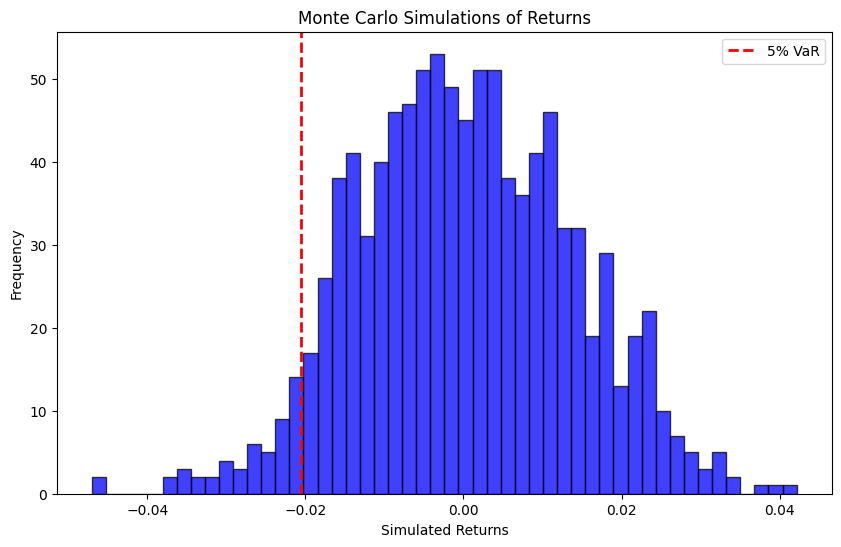

Monte Carlo VaR (95% confidence): -0.020532923179772122


In [ ]:
import matplotlib.pyplot as plt

def monte_carlo_simulation(log_returns, num_simulations=1000):
    mean = log_returns.mean()
    std_dev = log_returns.std()
    simulated_returns = np.random.normal(mean, std_dev, num_simulations)
    return simulated_returns

# Generate Monte Carlo simulations for NIFTY 50
simulated_returns = monte_carlo_simulation(df['Log_Returns'])

# Plot the Monte Carlo simulation curve
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Monte Carlo Simulations of Returns')
plt.xlabel('Simulated Returns')
plt.ylabel('Frequency')
plt.axvline(np.percentile(simulated_returns, 5), color='red', linestyle='dashed', linewidth=2, label='5% VaR')
plt.legend()
plt.show()

# Calculate Monte Carlo VaR
var_monte_carlo = np.percentile(simulated_returns, 5)
print(f"Monte Carlo VaR (95% confidence): {var_monte_carlo}")


In [ ]:
def calculate_cvar(log_returns, var_method='historical', confidence_level=0.99):
    if var_method == 'historical':
        var = calculate_historical_var(log_returns, confidence_level)
    elif var_method == 'parametric':
        var = calculate_parametric_var(log_returns, confidence_level)
    elif var_method == 'monte_carlo':
        var = monte_carlo_var(log_returns, confidence_level)

    cvar = log_returns[log_returns <= var].mean()
    return cvar

# Calculate C-VaR using historical method
df['Historical_CVaR'] = df['Log_Returns'].rolling(window=252).apply(lambda x: calculate_cvar(x, var_method='historical'))

# Calculate C-VaR using parametric method
df['Parametric_CVaR'] = df['Log_Returns'].rolling(window=252).apply(lambda x: calculate_cvar(x, var_method='parametric'))

# Calculate C-VaR using Monte Carlo method
df['Monte_Carlo_CVaR'] = df['Log_Returns'].rolling(window=252).apply(lambda x: calculate_cvar(x, var_method='monte_carlo'))

# Display the DataFrame with C-VaR values
print(df[['Date', 'Log_Returns', 'Historical_CVaR', 'Parametric_CVaR', 'Monte_Carlo_CVaR']].dropna().head())


           Date  Log_Returns  Historical_CVaR  Parametric_CVaR  \
5150 2002-08-20     0.008840        -0.052955        -0.048083   
5149 2002-08-21    -0.000101        -0.052955        -0.048083   
5148 2002-08-22    -0.002786        -0.052955        -0.048083   
5147 2002-08-23     0.009592        -0.052955        -0.048083   
5146 2002-08-26     0.003661        -0.052955        -0.048083   

      Monte_Carlo_CVaR  
5150         -0.048083  
5149         -0.048083  
5148         -0.048083  
5147         -0.044803  
5146         -0.048083  


In [ ]:
df

,Date,Close,Log_Returns,SMA_VaR,EWMA_VaR,Historical_VaR,Parametric_VaR,Monte_Carlo_VaR,Historical_CVaR,Parametric_CVaR,Monte_Carlo_CVaR
5402,2001-08-16,1078.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5401,2001-08-17,1069.20,-0.009078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5400,2001-08-20,1063.75,-0.005110,NaN,-0.000114,NaN,NaN,NaN,NaN,NaN,NaN
5399,2001-08-21,1068.70,0.004643,NaN,-0.000291,NaN,NaN,NaN,NaN,NaN,NaN
5398,2001-08-23,1071.50,0.002617,NaN,-0.000256,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-08,18264.40,0.010756,-0.000358,-0.000276,-0.023203,-0.020764,-0.019942,-0.025609,-0.024129,-0.024129
3,2023-05-09,18265.95,0.000085,-0.000358,-0.000261,-0.023203,-0.020770,-0.020852,-0.025609,-0.024129,-0.023370
2,2023-05-10,18315.10,0.002687,-0.000353,-0.000246,-0.022462,-0.020582,-0.019925,-0.025362,-0.024361,-0.024361
1,2023-05-11,18297.00,-0.000989,-0.000353,-0.000236,-0.022462,-0.020578,-0.022334,-0.025362,-0.024361,-0.023403


In [ ]:
df.dropna(inplace = True)

In [ ]:
df

,Date,Close,Log_Returns,SMA_VaR,EWMA_VaR,Historical_VaR,Parametric_VaR,Monte_Carlo_VaR,Historical_CVaR,Parametric_CVaR,Monte_Carlo_CVaR
5150,2002-08-20,988.55,0.008840,-0.000540,-0.000374,-0.050895,-0.030558,-0.029333,-0.052955,-0.048083,-0.048083
5149,2002-08-21,988.45,-0.000101,-0.000539,-0.000352,-0.050895,-0.030567,-0.031214,-0.052955,-0.048083,-0.048083
5148,2002-08-22,985.70,-0.002786,-0.000539,-0.000336,-0.050895,-0.030571,-0.030784,-0.052955,-0.048083,-0.048083
5147,2002-08-23,995.20,0.009592,-0.000539,-0.000338,-0.050895,-0.030616,-0.030293,-0.052955,-0.048083,-0.044803
5146,2002-08-26,998.85,0.003661,-0.000539,-0.000320,-0.050895,-0.030622,-0.028544,-0.052955,-0.048083,-0.048083
...,...,...,...,...,...,...,...,...,...,...,...
4,2023-05-08,18264.40,0.010756,-0.000358,-0.000276,-0.023203,-0.020764,-0.019942,-0.025609,-0.024129,-0.024129
3,2023-05-09,18265.95,0.000085,-0.000358,-0.000261,-0.023203,-0.020770,-0.020852,-0.025609,-0.024129,-0.023370
2,2023-05-10,18315.10,0.002687,-0.000353,-0.000246,-0.022462,-0.020582,-0.019925,-0.025362,-0.024361,-0.024361
1,2023-05-11,18297.00,-0.000989,-0.000353,-0.000236,-0.022462,-0.020578,-0.022334,-0.025362,-0.024361,-0.023403


In [ ]:
# Function to backtest VaR models
def backtest_var(actual_returns, var_series):
    # Exceedances occur when actual returns are less than the VaR (indicating a higher loss than predicted)
    exceedances = actual_returns < var_series
    # Calculate the number of exceedances and the exceedance rate
    num_exceedances = exceedances.sum()
    exceedance_rate = num_exceedances / len(exceedances)
    return num_exceedances, exceedance_rate

# Calculate exceedances for each VaR technique using a 1000-day rolling window

# Backtest SMA VaR
sma_exceedances, sma_exceedance_rate = backtest_var(df['Log_Returns'], df['SMA_VaR'])

# Backtest EWMA VaR
ewma_exceedances, ewma_exceedance_rate = backtest_var(df['Log_Returns'], df['EWMA_VaR'])

# Backtest Parametric VaR
parametric_exceedances, parametric_exceedance_rate = backtest_var(df['Log_Returns'], df['Parametric_VaR'])

# Backtest Monte Carlo VaR
monte_carlo_exceedances, monte_carlo_exceedance_rate = backtest_var(df['Log_Returns'], df['Monte_Carlo_VaR'])

# Backtest Historical VaR
historical_exceedances, historical_exceedance_rate = backtest_var(df['Log_Returns'], df['Historical_VaR'])

# Display backtesting results
backtest_results = {
    'Model': ['SMA VaR', 'EWMA VaR', 'Parametric VaR', 'Monte Carlo VaR', 'Historical VaR'],
    'Exceedances': [sma_exceedances, ewma_exceedances, parametric_exceedances, monte_carlo_exceedances, historical_exceedances],
    'Exceedance Rate': [sma_exceedance_rate, ewma_exceedance_rate, parametric_exceedance_rate, monte_carlo_exceedance_rate, historical_exceedance_rate]
}

import pandas as pd
backtest_results_df = pd.DataFrame(backtest_results)

backtest_results_df


,Model,Exceedances,Exceedance Rate
0,SMA VaR,2213,0.432649
1,EWMA VaR,2236,0.437146
2,Parametric VaR,91,0.017791
3,Monte Carlo VaR,112,0.021896
4,Historical VaR,48,0.009384


In [ ]:
import pandas as pd

def calculate_exceedance_rates(df, var_col):
    # Calculate exceedances (where actual returns are less than the C-VaR)
    exceedances = df['Log_Returns'] < df[var_col]

    # Calculate the number of exceedances and the exceedance rate
    num_exceedances = exceedances.sum()
    exceedance_rate = num_exceedances / len(df['Log_Returns'])

    return num_exceedances, exceedance_rate

# Calculate exceedance rates for Historical_CVaR, Parametric_CVaR, and Monte_Carlo_CVaR
historical_cvar_exceedances, historical_cvar_exceedance_rate = calculate_exceedance_rates(df, 'Historical_CVaR')
parametric_cvar_exceedances, parametric_cvar_exceedance_rate = calculate_exceedance_rates(df, 'Parametric_CVaR')
monte_carlo_cvar_exceedances, monte_carlo_cvar_exceedance_rate = calculate_exceedance_rates(df, 'Monte_Carlo_CVaR')

# Store the results in a dictionary
results = {
    'C-VaR Model': ['Historical_CVaR', 'Parametric_CVaR', 'Monte_Carlo_CVaR'],
    'Exceedances': [historical_cvar_exceedances, parametric_cvar_exceedances, monte_carlo_cvar_exceedances],
    'Exceedance Rate': [historical_cvar_exceedance_rate, parametric_cvar_exceedance_rate, monte_carlo_cvar_exceedance_rate]
}

# Convert the results into a DataFrame for easy comparison
results_df = pd.DataFrame(results)


# Determine the best C-VaR based on the lowest exceedance rate
best_cvar = results_df.loc[results_df['Exceedance Rate'].idxmin()]

print(results_df)
print(f"The best C-VaR model is: {best_cvar['C-VaR Model']} with an exceedance rate of {best_cvar['Exceedance Rate']:.4f}")


        C-VaR Model  Exceedances  Exceedance Rate
0   Historical_CVaR           31         0.006061
1   Parametric_CVaR           42         0.008211
2  Monte_Carlo_CVaR           43         0.008407
The best C-VaR model is: Historical_CVaR with an exceedance rate of 0.0061


In [ ]:
cols_to_delete = ['Open', 'High', 'Low', 'Vol.', 'Change %']

# Dropping the columns
df2 = df2.drop(columns=cols_to_delete)

In [ ]:
# Assuming your DataFrame is named 'df' and you want to rename a column
df2.rename(columns={'Price': 'Close'}, inplace=True)



In [ ]:
df2

,Date,Close
0,12-05-2023,82.201
1,11-05-2023,82.100
2,10-05-2023,81.925
3,09-05-2023,82.125
4,08-05-2023,81.780
...,...,...
4885,20-08-2004,46.225
4886,19-08-2004,46.250
4887,18-08-2004,46.300
4888,17-08-2004,46.300


In [ ]:
df = df2
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort the data by Date
df = df.sort_values(by='Date')

# Display the updated DataFrame
print(df.head())


           Date   Close
4889 2004-08-16  46.335
4888 2004-08-17  46.300
4887 2004-08-18  46.300
4886 2004-08-19  46.250
4885 2004-08-20  46.225


In [ ]:
df2 = df

In [ ]:
import numpy as np

# Calculate log returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Display the DataFrame with log returns
print(df.head())


           Date   Close  Log_Returns
4889 2004-08-16  46.335          NaN
4888 2004-08-17  46.300    -0.000756
4887 2004-08-18  46.300     0.000000
4886 2004-08-19  46.250    -0.001080
4885 2004-08-20  46.225    -0.000541


In [ ]:
def calculate_sma_var(log_returns, confidence_level=0.99):
    std_dev = log_returns.rolling(window=252).std()
    var = std_dev * np.percentile(log_returns.dropna(), 100 * (1 - confidence_level))
    return var

# Calculate SMA VaR
df['SMA_VaR'] = calculate_sma_var(df['Log_Returns'])

# Display the DataFrame with SMA VaR
print(df[['Date', 'Log_Returns', 'SMA_VaR']].dropna().head())


           Date  Log_Returns   SMA_VaR
4637 2005-08-03    -0.001841 -0.000027
4636 2005-08-04     0.001841 -0.000027
4635 2005-08-05    -0.000690 -0.000027
4634 2005-08-08     0.000575 -0.000027
4633 2005-08-09     0.000690 -0.000027


In [ ]:
def calculate_ewma_var(log_returns, decay_factor=0.94, confidence_level=0.99):
    ewma_variance = log_returns.ewm(span=1/(1-decay_factor)).var()
    var = np.sqrt(ewma_variance) * np.percentile(log_returns.dropna(), 100 * (1 - confidence_level))
    return var

# Calculate EWMA VaR
df['EWMA_VaR'] = calculate_ewma_var(df['Log_Returns'])

# Display the DataFrame with EWMA VaR
print(df[['Date', 'Log_Returns', 'EWMA_VaR']].dropna().head())


           Date  Log_Returns  EWMA_VaR
4887 2004-08-18     0.000000 -0.000006
4886 2004-08-19    -0.001080 -0.000006
4885 2004-08-20    -0.000541 -0.000005
4884 2004-08-23    -0.000541 -0.000004
4883 2004-08-24     0.001622 -0.000012


In [ ]:
def calculate_historical_var(log_returns, confidence_level=0.99):
    sorted_returns = np.sort(log_returns.dropna())
    var_index = int((1 - confidence_level) * len(sorted_returns))
    var = sorted_returns[var_index]
    return var

# Calculate Historical Simulation VaR using a rolling window
df['Historical_VaR'] = df['Log_Returns'].rolling(window=252).apply(calculate_historical_var)

# Display the DataFrame with Historical VaR
print(df[['Date', 'Log_Returns', 'Historical_VaR']].dropna().head())


           Date  Log_Returns  Historical_VaR
4637 2005-08-03    -0.001841       -0.009014
4636 2005-08-04     0.001841       -0.009014
4635 2005-08-05    -0.000690       -0.009014
4634 2005-08-08     0.000575       -0.009014
4633 2005-08-09     0.000690       -0.009014


In [ ]:
from scipy.stats import norm

# Now, let's define the Parametric VaR function again with norm defined
def calculate_parametric_var(log_returns, confidence_level=0.99):
    mean = log_returns.mean()
    std_dev = log_returns.std()
    var = norm.ppf(1 - confidence_level) * std_dev - mean
    return var

# Calculate Parametric VaR
df['Parametric_VaR'] = df['Log_Returns'].rolling(window=252).apply(calculate_parametric_var)

# Display the DataFrame with Parametric VaR
print(df[['Date', 'Log_Returns', 'Parametric_VaR']].dropna().head())



           Date  Log_Returns  Parametric_VaR
4637 2005-08-03    -0.001841       -0.005334
4636 2005-08-04     0.001841       -0.005352
4635 2005-08-05    -0.000690       -0.005349
4634 2005-08-08     0.000575       -0.005356
4633 2005-08-09     0.000690       -0.005362


In [ ]:
import numpy as np

def monte_carlo_var(log_returns, confidence_level=0.99, num_simulations=1000):
    mean = log_returns.mean()
    std_dev = log_returns.std()
    simulated_returns = np.random.normal(mean, std_dev, num_simulations)
    var = np.percentile(simulated_returns, (1 - confidence_level) * 100)
    return var

# Calculate Monte Carlo VaR using a rolling window
df['Monte_Carlo_VaR'] = df['Log_Returns'].rolling(window=252).apply(monte_carlo_var)

# Display the DataFrame with Monte Carlo VaR
print(df[['Date', 'Log_Returns', 'Monte_Carlo_VaR']].dropna().head())


           Date  Log_Returns  Monte_Carlo_VaR
4637 2005-08-03    -0.001841        -0.005803
4636 2005-08-04     0.001841        -0.005749
4635 2005-08-05    -0.000690        -0.005811
4634 2005-08-08     0.000575        -0.005848
4633 2005-08-09     0.000690        -0.005648


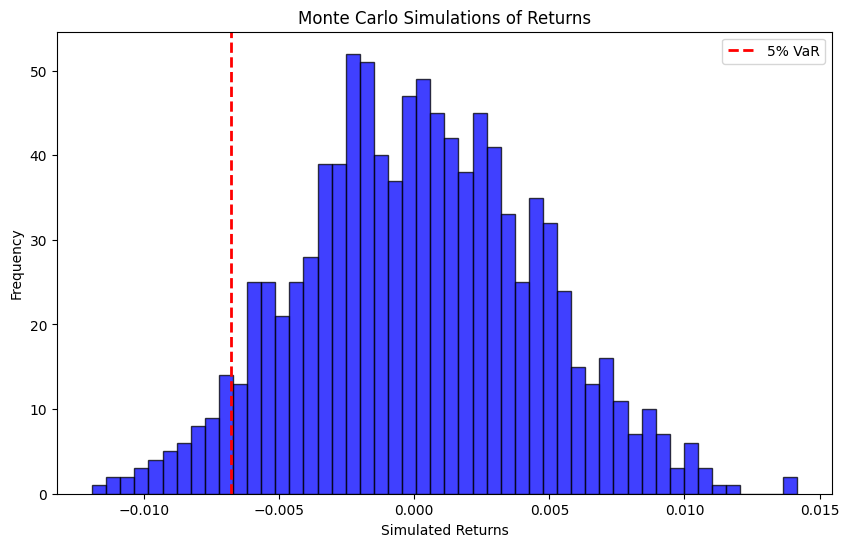

Monte Carlo VaR (95% confidence): -0.006795093822060097


In [ ]:
import matplotlib.pyplot as plt

def monte_carlo_simulation(log_returns, num_simulations=1000):
    mean = log_returns.mean()
    std_dev = log_returns.std()
    simulated_returns = np.random.normal(mean, std_dev, num_simulations)
    return simulated_returns

# Generate Monte Carlo simulations for NIFTY 50
simulated_returns = monte_carlo_simulation(df['Log_Returns'])

# Plot the Monte Carlo simulation curve
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Monte Carlo Simulations of Returns')
plt.xlabel('Simulated Returns')
plt.ylabel('Frequency')
plt.axvline(np.percentile(simulated_returns, 5), color='red', linestyle='dashed', linewidth=2, label='5% VaR')
plt.legend()
plt.show()

# Calculate Monte Carlo VaR
var_monte_carlo = np.percentile(simulated_returns, 5)
print(f"Monte Carlo VaR (95% confidence): {var_monte_carlo}")


In [ ]:
def calculate_cvar(log_returns, var_method='historical', confidence_level=0.99):
    if var_method == 'historical':
        var = calculate_historical_var(log_returns, confidence_level)
    elif var_method == 'parametric':
        var = calculate_parametric_var(log_returns, confidence_level)
    elif var_method == 'monte_carlo':
        var = monte_carlo_var(log_returns, confidence_level)

    cvar = log_returns[log_returns <= var].mean()
    return cvar

# Calculate C-VaR using historical method
df['Historical_CVaR'] = df['Log_Returns'].rolling(window=252).apply(lambda x: calculate_cvar(x, var_method='historical'))

# Calculate C-VaR using parametric method
df['Parametric_CVaR'] = df['Log_Returns'].rolling(window=252).apply(lambda x: calculate_cvar(x, var_method='parametric'))

# Calculate C-VaR using Monte Carlo method
df['Monte_Carlo_CVaR'] = df['Log_Returns'].rolling(window=252).apply(lambda x: calculate_cvar(x, var_method='monte_carlo'))

# Display the DataFrame with C-VaR values
print(df[['Date', 'Log_Returns', 'Historical_CVaR', 'Parametric_CVaR', 'Monte_Carlo_CVaR']].dropna().head())


           Date  Log_Returns  Historical_CVaR  Parametric_CVaR  \
4637 2005-08-03    -0.001841        -0.010872        -0.008482   
4636 2005-08-04     0.001841        -0.010872        -0.008482   
4635 2005-08-05    -0.000690        -0.010872        -0.008482   
4634 2005-08-08     0.000575        -0.010872        -0.008482   
4633 2005-08-09     0.000690        -0.010872        -0.008482   

      Monte_Carlo_CVaR  
4637         -0.008482  
4636         -0.008482  
4635         -0.008482  
4634         -0.008817  
4633         -0.008482  


In [ ]:
df.dropna(inplace = True)

In [ ]:
# Function to backtest VaR models
def backtest_var(actual_returns, var_series):
    # Exceedances occur when actual returns are less than the VaR (indicating a higher loss than predicted)
    exceedances = actual_returns < var_series
    # Calculate the number of exceedances and the exceedance rate
    num_exceedances = exceedances.sum()
    exceedance_rate = num_exceedances / len(exceedances)
    return num_exceedances, exceedance_rate

# Calculate exceedances for each VaR technique using a 1000-day rolling window

# Backtest SMA VaR
sma_exceedances, sma_exceedance_rate = backtest_var(df['Log_Returns'], df['SMA_VaR'])

# Backtest EWMA VaR
ewma_exceedances, ewma_exceedance_rate = backtest_var(df['Log_Returns'], df['EWMA_VaR'])

# Backtest Parametric VaR
parametric_exceedances, parametric_exceedance_rate = backtest_var(df['Log_Returns'], df['Parametric_VaR'])

# Backtest Monte Carlo VaR
monte_carlo_exceedances, monte_carlo_exceedance_rate = backtest_var(df['Log_Returns'], df['Monte_Carlo_VaR'])

# Backtest Historical VaR
historical_exceedances, historical_exceedance_rate = backtest_var(df['Log_Returns'], df['Historical_VaR'])

# Display backtesting results
backtest_results = {
    'Model': ['SMA VaR', 'EWMA VaR', 'Parametric VaR', 'Monte Carlo VaR', 'Historical VaR'],
    'Exceedances': [sma_exceedances, ewma_exceedances, parametric_exceedances, monte_carlo_exceedances, historical_exceedances],
    'Exceedance Rate': [sma_exceedance_rate, ewma_exceedance_rate, parametric_exceedance_rate, monte_carlo_exceedance_rate, historical_exceedance_rate]
}

import pandas as pd
backtest_results_df = pd.DataFrame(backtest_results)

backtest_results_df


,Model,Exceedances,Exceedance Rate
0,SMA VaR,2240,0.489297
1,EWMA VaR,2241,0.489515
2,Parametric VaR,69,0.015072
3,Monte Carlo VaR,80,0.017475
4,Historical VaR,40,0.008737


In [ ]:
import pandas as pd

def calculate_exceedance_rates(df, var_col):
    # Calculate exceedances (where actual returns are less than the C-VaR)
    exceedances = df['Log_Returns'] < df[var_col]

    # Calculate the number of exceedances and the exceedance rate
    num_exceedances = exceedances.sum()
    exceedance_rate = num_exceedances / len(df['Log_Returns'])

    return num_exceedances, exceedance_rate

# Calculate exceedance rates for Historical_CVaR, Parametric_CVaR, and Monte_Carlo_CVaR
historical_cvar_exceedances, historical_cvar_exceedance_rate = calculate_exceedance_rates(df, 'Historical_CVaR')
parametric_cvar_exceedances, parametric_cvar_exceedance_rate = calculate_exceedance_rates(df, 'Parametric_CVaR')
monte_carlo_cvar_exceedances, monte_carlo_cvar_exceedance_rate = calculate_exceedance_rates(df, 'Monte_Carlo_CVaR')

# Store the results in a dictionary
results = {
    'C-VaR Model': ['Historical_CVaR', 'Parametric_CVaR', 'Monte_Carlo_CVaR'],
    'Exceedances': [historical_cvar_exceedances, parametric_cvar_exceedances, monte_carlo_cvar_exceedances],
    'Exceedance Rate': [historical_cvar_exceedance_rate, parametric_cvar_exceedance_rate, monte_carlo_cvar_exceedance_rate]
}

# Convert the results into a DataFrame for easy comparison
results_df = pd.DataFrame(results)



# Determine the best C-VaR based on the lowest exceedance rate
best_cvar = results_df.loc[results_df['Exceedance Rate'].idxmin()]

print(results_df)
print(f"The best C-VaR model is: {best_cvar['C-VaR Model']} with an exceedance rate of {best_cvar['Exceedance Rate']:.4f}")


        C-VaR Model  Exceedances  Exceedance Rate
0   Historical_CVaR           26         0.005679
1   Parametric_CVaR           29         0.006335
2  Monte_Carlo_CVaR           32         0.006990
The best C-VaR model is: Historical_CVaR with an exceedance rate of 0.0057


In [ ]:
df3

,Date,Close
0,8/15/2001,"12,975.9"
1,8/16/2001,"12,999.0"
2,8/17/2001,"13,074.8"
3,8/20/2001,"13,038.5"
4,8/21/2001,"13,016.5"
...,...,...
5668,5/8/2023,"163,437.0"
5669,5/9/2023,"166,607.4"
5670,5/10/2023,"166,932.0"
5671,5/11/2023,"165,589.1"


In [ ]:
import pandas as pd

df = df3

# Assuming your DataFrame is named 'df' and the date column is named 'Date'
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Display the updated DataFrame
print(df.head())


        Date     Close
0 2001-08-15  12,975.9
1 2001-08-16  12,999.0
2 2001-08-17  13,074.8
3 2001-08-20  13,038.5
4 2001-08-21  13,016.5


In [ ]:
df = df.sort_values(by='Date')


In [ ]:
df3=df

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the Close prices column is named 'Close'
df['Close'] = df['Close'].str.replace(',', '')  # Remove commas
df['Close'] = pd.to_numeric(df['Close'])  # Convert to numeric (decimal) format

# Display the updated DataFrame
print(df.head())


        Date    Close
0 2001-08-15  12975.9
1 2001-08-16  12999.0
2 2001-08-17  13074.8
3 2001-08-20  13038.5
4 2001-08-21  13016.5


In [ ]:
import numpy as np

# Calculate log returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Display the DataFrame with log returns
print(df.head())


        Date    Close  Log_Returns
0 2001-08-15  12975.9          NaN
1 2001-08-16  12999.0     0.001779
2 2001-08-17  13074.8     0.005814
3 2001-08-20  13038.5    -0.002780
4 2001-08-21  13016.5    -0.001689


In [ ]:
def calculate_sma_var(log_returns, confidence_level=0.99):
    std_dev = log_returns.rolling(window=252).std()
    var = std_dev * np.percentile(log_returns.dropna(), 100 * (1 - confidence_level))
    return var

# Calculate SMA VaR
df['SMA_VaR'] = calculate_sma_var(df['Log_Returns'])

# Display the DataFrame with SMA VaR
print(df[['Date', 'Log_Returns', 'SMA_VaR']].dropna().head())


          Date  Log_Returns   SMA_VaR
252 2002-08-02     0.009219 -0.000262
253 2002-08-05     0.014176 -0.000263
254 2002-08-06    -0.010752 -0.000264
255 2002-08-07     0.019851 -0.000266
256 2002-08-08    -0.000165 -0.000266


In [ ]:
def calculate_ewma_var(log_returns, decay_factor=0.94, confidence_level=0.99):
    ewma_variance = log_returns.ewm(span=1/(1-decay_factor)).var()
    var = np.sqrt(ewma_variance) * np.percentile(log_returns.dropna(), 100 * (1 - confidence_level))
    return var

# Calculate EWMA VaR
df['EWMA_VaR'] = calculate_ewma_var(df['Log_Returns'])

# Display the DataFrame with EWMA VaR
print(df[['Date', 'Log_Returns', 'EWMA_VaR']].dropna().head())


        Date  Log_Returns  EWMA_VaR
2 2001-08-17     0.005814 -0.000085
3 2001-08-20    -0.002780 -0.000132
4 2001-08-21    -0.001689 -0.000115
5 2001-08-22    -0.001207 -0.000100
6 2001-08-23    -0.003738 -0.000100


In [ ]:
def calculate_historical_var(log_returns, confidence_level=0.99):
    sorted_returns = np.sort(log_returns.dropna())
    var_index = int((1 - confidence_level) * len(sorted_returns))
    var = sorted_returns[var_index]
    return var

# Calculate Historical Simulation VaR using a rolling window
df['Historical_VaR'] = df['Log_Returns'].rolling(window=252).apply(calculate_historical_var)

# Display the DataFrame with Historical VaR
print(df[['Date', 'Log_Returns', 'Historical_VaR']].dropna().head())


          Date  Log_Returns  Historical_VaR
252 2002-08-02     0.009219       -0.021345
253 2002-08-05     0.014176       -0.021345
254 2002-08-06    -0.010752       -0.021345
255 2002-08-07     0.019851       -0.021345
256 2002-08-08    -0.000165       -0.021345


In [ ]:
from scipy.stats import norm

# Now, let's define the Parametric VaR function again with norm defined
def calculate_parametric_var(log_returns, confidence_level=0.99):
    mean = log_returns.mean()
    std_dev = log_returns.std()
    var = norm.ppf(1 - confidence_level) * std_dev - mean
    return var

# Calculate Parametric VaR
df['Parametric_VaR'] = df['Log_Returns'].rolling(window=252).apply(calculate_parametric_var)

# Display the DataFrame with Parametric VaR
print(df[['Date', 'Log_Returns', 'Parametric_VaR']].dropna().head())



          Date  Log_Returns  Parametric_VaR
252 2002-08-02     0.009219       -0.021069
253 2002-08-05     0.014176       -0.021214
254 2002-08-06    -0.010752       -0.021201
255 2002-08-07     0.019851       -0.021478
256 2002-08-08    -0.000165       -0.021482


In [ ]:
import numpy as np

def monte_carlo_var(log_returns, confidence_level=0.99, num_simulations=1000):
    mean = log_returns.mean()
    std_dev = log_returns.std()
    simulated_returns = np.random.normal(mean, std_dev, num_simulations)
    var = np.percentile(simulated_returns, (1 - confidence_level) * 100)
    return var

# Calculate Monte Carlo VaR using a rolling window
df['Monte_Carlo_VaR'] = df['Log_Returns'].rolling(window=252).apply(monte_carlo_var)

# Display the DataFrame with Monte Carlo VaR
print(df[['Date', 'Log_Returns', 'Monte_Carlo_VaR']].dropna().head())


          Date  Log_Returns  Monte_Carlo_VaR
252 2002-08-02     0.009219        -0.019603
253 2002-08-05     0.014176        -0.021754
254 2002-08-06    -0.010752        -0.019171
255 2002-08-07     0.019851        -0.020499
256 2002-08-08    -0.000165        -0.021303


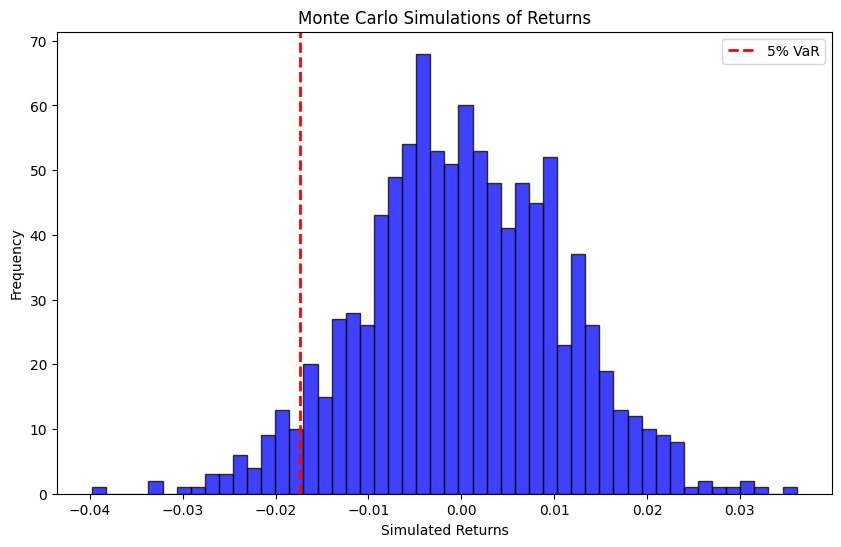

Monte Carlo VaR (95% confidence): -0.017332475875087534


In [ ]:
import matplotlib.pyplot as plt

def monte_carlo_simulation(log_returns, num_simulations=1000):
    mean = log_returns.mean()
    std_dev = log_returns.std()
    simulated_returns = np.random.normal(mean, std_dev, num_simulations)
    return simulated_returns

# Generate Monte Carlo simulations for NIFTY 50
simulated_returns = monte_carlo_simulation(df['Log_Returns'])

# Plot the Monte Carlo simulation curve
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.title('Monte Carlo Simulations of Returns')
plt.xlabel('Simulated Returns')
plt.ylabel('Frequency')
plt.axvline(np.percentile(simulated_returns, 5), color='red', linestyle='dashed', linewidth=2, label='5% VaR')
plt.legend()
plt.show()

# Calculate Monte Carlo VaR
var_monte_carlo = np.percentile(simulated_returns, 5)
print(f"Monte Carlo VaR (95% confidence): {var_monte_carlo}")


In [ ]:
def calculate_cvar(log_returns, var_method='historical', confidence_level=0.99):
    if var_method == 'historical':
        var = calculate_historical_var(log_returns, confidence_level)
    elif var_method == 'parametric':
        var = calculate_parametric_var(log_returns, confidence_level)
    elif var_method == 'monte_carlo':
        var = monte_carlo_var(log_returns, confidence_level)

    cvar = log_returns[log_returns <= var].mean()
    return cvar

# Calculate C-VaR using historical method
df['Historical_CVaR'] = df['Log_Returns'].rolling(window=252).apply(lambda x: calculate_cvar(x, var_method='historical'))

# Calculate C-VaR using parametric method
df['Parametric_CVaR'] = df['Log_Returns'].rolling(window=252).apply(lambda x: calculate_cvar(x, var_method='parametric'))

# Calculate C-VaR using Monte Carlo method
df['Monte_Carlo_CVaR'] = df['Log_Returns'].rolling(window=252).apply(lambda x: calculate_cvar(x, var_method='monte_carlo'))

# Display the DataFrame with C-VaR values
print(df[['Date', 'Log_Returns', 'Historical_CVaR', 'Parametric_CVaR', 'Monte_Carlo_CVaR']].dropna().head())


          Date  Log_Returns  Historical_CVaR  Parametric_CVaR  \
252 2002-08-02     0.009219        -0.025326        -0.025326   
253 2002-08-05     0.014176        -0.025326        -0.025326   
254 2002-08-06    -0.010752        -0.025326        -0.025326   
255 2002-08-07     0.019851        -0.025326        -0.027316   
256 2002-08-08    -0.000165        -0.025326        -0.027316   

     Monte_Carlo_CVaR  
252         -0.027316  
253         -0.024249  
254         -0.024249  
255         -0.024249  
256         -0.024249  


In [ ]:
df.dropna(inplace=True)

In [ ]:
# Function to backtest VaR models
def backtest_var(actual_returns, var_series):
    # Exceedances occur when actual returns are less than the VaR (indicating a higher loss than predicted)
    exceedances = actual_returns < var_series
    # Calculate the number of exceedances and the exceedance rate
    num_exceedances = exceedances.sum()
    exceedance_rate = num_exceedances / len(exceedances)
    return num_exceedances, exceedance_rate

# Calculate exceedances for each VaR technique using a 1000-day rolling window

# Backtest SMA VaR
sma_exceedances, sma_exceedance_rate = backtest_var(df['Log_Returns'], df['SMA_VaR'])

# Backtest EWMA VaR
ewma_exceedances, ewma_exceedance_rate = backtest_var(df['Log_Returns'], df['EWMA_VaR'])

# Backtest Parametric VaR
parametric_exceedances, parametric_exceedance_rate = backtest_var(df['Log_Returns'], df['Parametric_VaR'])

# Backtest Monte Carlo VaR
monte_carlo_exceedances, monte_carlo_exceedance_rate = backtest_var(df['Log_Returns'], df['Monte_Carlo_VaR'])

# Backtest Historical VaR
historical_exceedances, historical_exceedance_rate = backtest_var(df['Log_Returns'], df['Historical_VaR'])

# Display backtesting results
backtest_results = {
    'Model': ['SMA VaR', 'EWMA VaR', 'Parametric VaR', 'Monte Carlo VaR', 'Historical VaR'],
    'Exceedances': [sma_exceedances, ewma_exceedances, parametric_exceedances, monte_carlo_exceedances, historical_exceedances],
    'Exceedance Rate': [sma_exceedance_rate, ewma_exceedance_rate, parametric_exceedance_rate, monte_carlo_exceedance_rate, historical_exceedance_rate]
}

import pandas as pd
backtest_results_df = pd.DataFrame(backtest_results)

backtest_results_df


,Model,Exceedances,Exceedance Rate
0,SMA VaR,2383,0.442279
1,EWMA VaR,2402,0.445805
2,Parametric VaR,81,0.015033
3,Monte Carlo VaR,101,0.018745
4,Historical VaR,42,0.007795


In [ ]:
import pandas as pd

def calculate_exceedance_rates(df, var_col):
    # Calculate exceedances (where actual returns are less than the C-VaR)
    exceedances = df['Log_Returns'] < df[var_col]

    # Calculate the number of exceedances and the exceedance rate
    num_exceedances = exceedances.sum()
    exceedance_rate = num_exceedances / len(df['Log_Returns'])

    return num_exceedances, exceedance_rate

# Calculate exceedance rates for Historical_CVaR, Parametric_CVaR, and Monte_Carlo_CVaR
historical_cvar_exceedances, historical_cvar_exceedance_rate = calculate_exceedance_rates(df, 'Historical_CVaR')
parametric_cvar_exceedances, parametric_cvar_exceedance_rate = calculate_exceedance_rates(df, 'Parametric_CVaR')
monte_carlo_cvar_exceedances, monte_carlo_cvar_exceedance_rate = calculate_exceedance_rates(df, 'Monte_Carlo_CVaR')

# Store the results in a dictionary
results = {
    'C-VaR Model': ['Historical_CVaR', 'Parametric_CVaR', 'Monte_Carlo_CVaR'],
    'Exceedances': [historical_cvar_exceedances, parametric_cvar_exceedances, monte_carlo_cvar_exceedances],
    'Exceedance Rate': [historical_cvar_exceedance_rate, parametric_cvar_exceedance_rate, monte_carlo_cvar_exceedance_rate]
}

# Convert the results into a DataFrame for easy comparison
results_df = pd.DataFrame(results)


# Determine the best C-VaR based on the lowest exceedance rate
best_cvar = results_df.loc[results_df['Exceedance Rate'].idxmin()]

print(results_df)
print(f"The best C-VaR model is: {best_cvar['C-VaR Model']} with an exceedance rate of {best_cvar['Exceedance Rate']:.4f}")


        C-VaR Model  Exceedances  Exceedance Rate
0   Historical_CVaR           30         0.005568
1   Parametric_CVaR           31         0.005754
2  Monte_Carlo_CVaR           37         0.006867
The best C-VaR model is: Historical_CVaR with an exceedance rate of 0.0056


In [ ]:
pip install arch


In [ ]:
import pandas as pd
import numpy as np
from arch import arch_model
from scipy.stats import norm

def garch_var_cvar_estimation(df, confidence_level=0.99):
    # Convert Date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate log returns
    df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df = df.dropna()  # Drop NaN values

    # Fit GARCH(1,1) model
    model = arch_model(df['Log_Returns'], vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')

    # Get conditional volatility (sigma) from the GARCH model
    sigma = model_fit.conditional_volatility

    # Calculate the mean of returns (assuming zero mean for simplicity)
    mu = df['Log_Returns'].mean()

    # Calculate GARCH VaR at the given confidence level
    var = mu - norm.ppf(confidence_level) * sigma

    # Calculate GARCH C-VaR (Expected Shortfall) as the average of the worst losses beyond VaR
    cvar = df['Log_Returns'][df['Log_Returns'] <= var].mean()

    # Add GARCH VaR and GARCH C-VaR estimates to the DataFrame
    df['GARCH_VaR'] = var
    df['GARCH_CVaR'] = cvar

    return df

# List of dataframes (df1 for NIFTY 50, df2 for USD/INR, df3 for GOLD)
dataframes = [df1, df2, df3]
names = ['NIFTY 50', 'USD/INR', 'GOLD']

# Iterate through each dataframe and apply GARCH VaR and C-VaR estimation
for i, (df, name) in enumerate(zip(dataframes, names)):
    # Apply GARCH VaR and C-VaR estimation
    dataframes[i] = garch_var_cvar_estimation(df)

# Now you have the GARCH_VaR and GARCH_CVaR columns added to df1, df2, and df3
# You can proceed to calculate exceedance rates for these columns

# Example: To check the first few rows of df1 (NIFTY 50)
print(dataframes[0].head())

# Calculate the exceedance rates for GARCH VaR and C-VaR across all dataframes
def calculate_exceedance_rates(df, var_col):
    # Calculate exceedances (where actual returns are less than the VaR or C-VaR)
    exceedances = df['Log_Returns'] < df[var_col]

    # Calculate the number of exceedances and the exceedance rate
    num_exceedances = exceedances.sum()
    exceedance_rate = num_exceedances / len(df['Log_Returns'])

    return num_exceedances, exceedance_rate

# Store results in a list of dictionaries for easy comparison
results = []
for df, name in zip(dataframes, names):
    garch_var_exceedances, garch_var_exceedance_rate = calculate_exceedance_rates(df, 'GARCH_VaR')
    garch_cvar_exceedances, garch_cvar_exceedance_rate = calculate_exceedance_rates(df, 'GARCH_CVaR')

    results.append({
        'Asset': name,
        'GARCH_VaR Exceedances': garch_var_exceedances,
        'GARCH_VaR Exceedance Rate': garch_var_exceedance_rate,
        'GARCH_CVaR Exceedances': garch_cvar_exceedances,
        'GARCH_CVaR Exceedance Rate': garch_cvar_exceedance_rate
    })

# Convert the results into a DataFrame for easy comparison
results_df = pd.DataFrame(results)


print(results_df)


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001927. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
<ipython-input-188-699a1df1aca6>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GARCH_VaR'] = var
<ipython-input-188-699a1df1aca6>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

           Date   Close  Log_Returns   SMA_VaR  EWMA_VaR  Historical_VaR  \
5149 2002-08-21  988.45    -0.000101 -0.000539 -0.000352       -0.050895   
5148 2002-08-22  985.70    -0.002786 -0.000539 -0.000336       -0.050895   
5147 2002-08-23  995.20     0.009592 -0.000539 -0.000338       -0.050895   
5146 2002-08-26  998.85     0.003661 -0.000539 -0.000320       -0.050895   
5145 2002-08-27  987.70    -0.011226 -0.000540 -0.000347       -0.050895   

      Parametric_VaR  Monte_Carlo_VaR  Historical_CVaR  Parametric_CVaR  \
5149       -0.030567        -0.031214        -0.052955        -0.048083   
5148       -0.030571        -0.030784        -0.052955        -0.048083   
5147       -0.030616        -0.030293        -0.052955        -0.048083   
5146       -0.030622        -0.028544        -0.052955        -0.048083   
5145       -0.030627        -0.030674        -0.052955        -0.048083   

      Monte_Carlo_CVaR  GARCH_VaR  GARCH_CVaR  
5149         -0.048083  -0.019121   -0.04042

In [ ]:
results_df

,Asset,GARCH_VaR Exceedances,GARCH_VaR Exceedance Rate,GARCH_CVaR Exceedances,GARCH_CVaR Exceedance Rate
0,NIFTY 50,84,0.016425,52,0.010168
1,USD/INR,61,0.013328,35,0.007647
2,GOLD,81,0.015036,44,0.008168


In [ ]:
import pandas as pd

# Combine the results for all three asset classes into a single table

# NIFTY 50 Results
nifty50_results = pd.DataFrame({
    'Model': ['SMA VaR', 'EWMA VaR', 'Parametric VaR', 'Monte Carlo VaR', 'Historical VaR', 'GARCH VaR', 'GARCH C-VaR', 'Historical_CVaR', 'Parametric_CVaR', 'Monte_Carlo_CVaR'],
    'Exceedances': [2213, 2236, 91, 112, 48, 84, 52, 31, 42, 43],
    'Exceedance Rate': [0.432649, 0.437146, 0.017791, 0.021896, 0.009384, 0.016425, 0.010168, 0.006061, 0.008211, 0.008407],
    'Asset': ['NIFTY 50'] * 10
})

# USD/INR Results
usdinr_results = pd.DataFrame({
    'Model': ['SMA VaR', 'EWMA VaR', 'Parametric VaR', 'Monte Carlo VaR', 'Historical VaR', 'GARCH VaR', 'GARCH C-VaR', 'Historical_CVaR', 'Parametric_CVaR', 'Monte_Carlo_CVaR'],
    'Exceedances': [2240, 2241, 69, 80, 61,40, 35, 26, 29, 32],
    'Exceedance Rate': [0.489297, 0.489515, 0.015072, 0.017475, 0.013328, 0.008737, 0.007647, 0.005679, 0.006335, 0.006990],
    'Asset': ['USD/INR'] * 10
})

# GOLD Results
gold_results = pd.DataFrame({
    'Model': ['SMA VaR', 'EWMA VaR', 'Parametric VaR', 'Monte Carlo VaR', 'Historical VaR', 'GARCH VaR', 'GARCH C-VaR', 'Historical_CVaR', 'Parametric_CVaR', 'Monte_Carlo_CVaR'],
    'Exceedances': [2383, 2402, 81, 101, 42, 81, 44, 30, 31, 37],
    'Exceedance Rate': [0.442279, 0.445805, 0.015033, 0.018745, 0.007795, 0.015036, 0.008168, 0.005568, 0.005754, 0.006867],
    'Asset': ['GOLD'] * 10
})

# Combine all results into a single DataFrame
combined_results = pd.concat([nifty50_results, usdinr_results, gold_results], ignore_index=True)


combined_results



,Model,Exceedances,Exceedance Rate,Asset
0,SMA VaR,2213,0.432649,NIFTY 50
1,EWMA VaR,2236,0.437146,NIFTY 50
2,Parametric VaR,91,0.017791,NIFTY 50
3,Monte Carlo VaR,112,0.021896,NIFTY 50
4,Historical VaR,48,0.009384,NIFTY 50
5,GARCH VaR,84,0.016425,NIFTY 50
6,GARCH C-VaR,52,0.010168,NIFTY 50
7,Historical_CVaR,31,0.006061,NIFTY 50
8,Parametric_CVaR,42,0.008211,NIFTY 50
9,Monte_Carlo_CVaR,43,0.008407,NIFTY 50
